In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print("The target (0~16):\n", train_y[0:16])

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
The target (0~16):
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


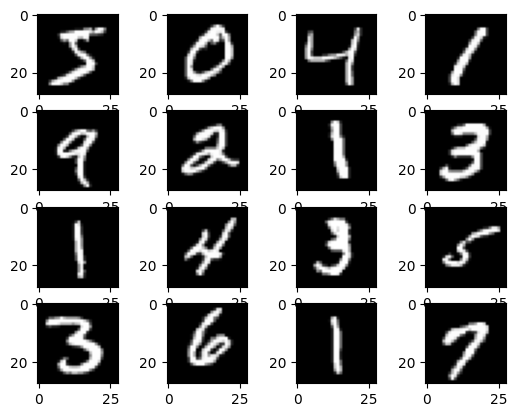

In [3]:
from matplotlib import pyplot

for i in range(16):
    pyplot.subplot(4, 4, 0 + 1 + i)  # 對於i=0，3,3,1代表3X3的九宮格裡的第一個格子
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))  # train_X[i]代表1~9張的28X28矩陣，'gray'表示圖片反黑，也可設置為'binary'數字為黑色

pyplot.show()

In [4]:
#Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derive(x):
    return x > 0

def sigmoid (x):  # for the hidden layer
    return np.exp(x) / (1 + np.exp(x))

def derv_sigmoid (x):  #微分後
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):  # for the output layer
    expon_x = np.exp(x)
    exponsum = np.sum(expon_x, axis=0, keepdims=True)  # 沿著row(垂直)做加總
    sofmax_x = expon_x / exponsum
    return sofmax_x

def cross_entropy_loss(x, y):
    m = x.shape[0]
    loss = -np.sum(x * np.log(y + 1e-8)) / m  # 加1e-8是為了防止y為0，loss變無限大(inf)
    return loss

In [7]:
# array flatten and transpose
x_train = train_X.reshape(60000,784).T
x_test = test_X.reshape(10000,784).T

# Normalization
x_train = x_train / 255
x_test = x_test / 255

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
#print(train_X[29999, :, :])
#print(x_train[200:500, 29999])

# one-hot encoding for y_train and y_test
y_train = np.zeros((10, 60000))
for i in range(len(train_y)):
    y_train[train_y[i], i] = 1

y_test = np.zeros((10, 10000))
for i in range(len(test_y)):
    y_test[test_y[i], i] = 1

x_train: (784, 60000)
x_test: (784, 10000)


### 1. one layer NN:
activation function: *sigmoid* <p>
loss function: *activation function gradient + error*

In [109]:
class OneLayer1:
    def __init__(self, num_class, num_neuron1, learncount, num_data=60000):
        self.w1 = np.random.randn(num_class, num_neuron1)
        self.b1 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = sigmoid(self.z1)
        return self.A1

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw1 = np.dot(error, x_train.T) / self.num_data
        self.db1 = np.sum(error, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

    def test(self, input, ground_truth):
        self.output = self.forward(input)
        self.finalresult = np.argmax(self.output, axis=0)
        print("predict result = \n", self.finalresult)
        print("real result = \n", test_y)

        # calculate the accuracy in percentage
        correctcount = 0
        for time in range(10000):
            if self.finalresult[time] == test_y[time]:
                correctcount += 1

        print("model accuracy = {}%".format(round(correctcount/10000*100, 2)))

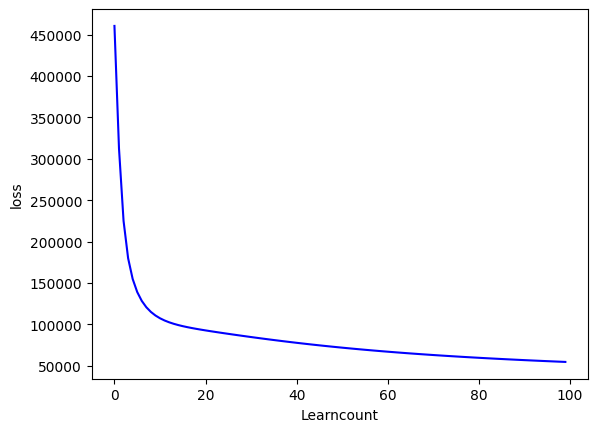

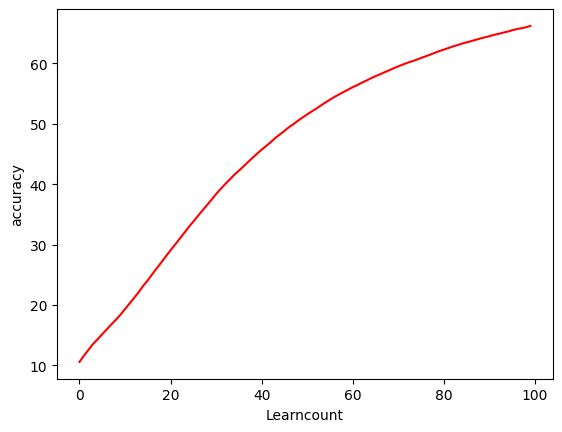

In [56]:
# train
nn1 = OneLayer1(10, 784, 100)
nn1.train()

### 2. one layer NN:
activation function: *relu* <p>
loss function: *activation function gradient + error*

In [58]:
class OneLayer2:
    def __init__(self, num_class, num_neuron1, learncount, num_data=60000):
        self.w1 = np.random.randn(num_class, num_neuron1)
        self.b1 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = relu(self.z1)
        return self.A1

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw1 = np.dot(error, x_train.T) / self.num_data
        self.db1 = np.sum(error, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

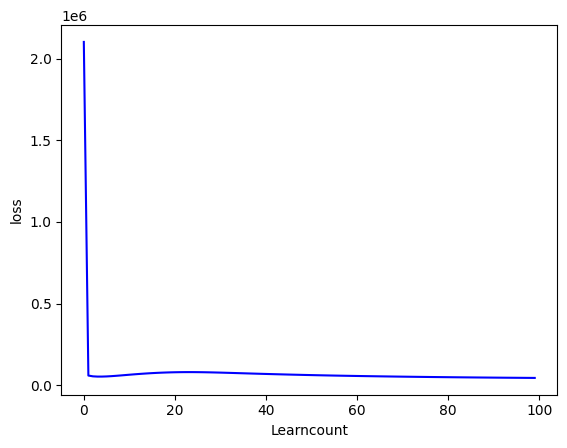

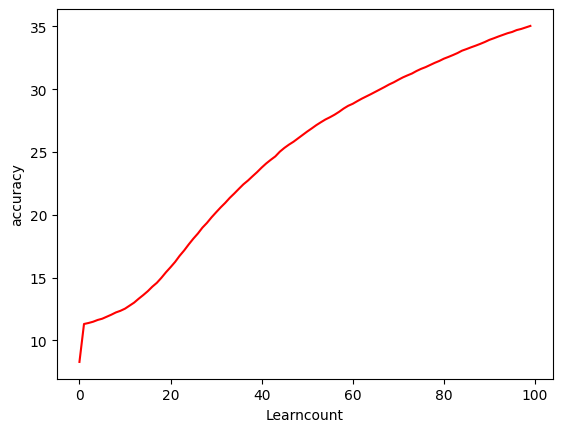

In [59]:
# train
nn2 = OneLayer2(10, 784, 100)
nn2.train()

### 3. one layer NN:
activation function: *sigmoid* <p>
loss function: *activation function gradient * error*

In [76]:
class OneLayer3:
    def __init__(self, num_class, num_neuron1, learncount, num_data=60000):
        self.w1 = np.random.randn(num_class, num_neuron1)
        self.b1 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = sigmoid(self.z1)
        return self.A1

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw1 = np.dot(error, x_train.T) / self.num_data
        self.db1 = np.sum(error, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

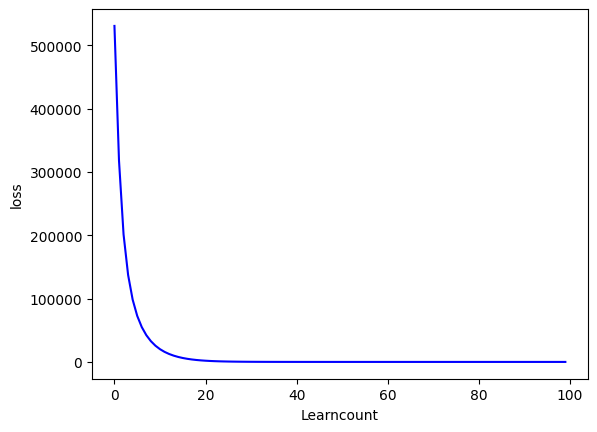

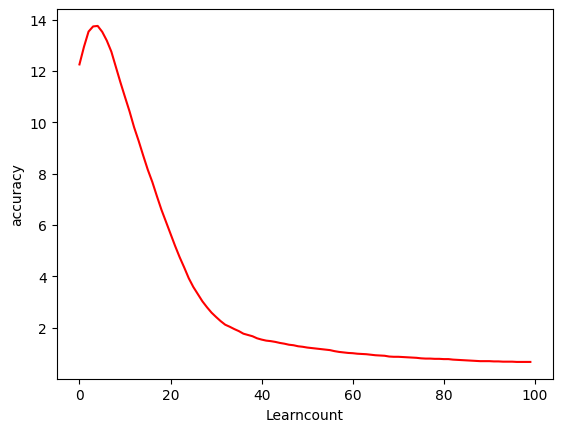

In [77]:
# train
nn3 = OneLayer3(10, 784, 100)
nn3.train()

### 4. two layer NN:
activation function: *sigmoid* <p>
loss function: *activation function gradient + error*

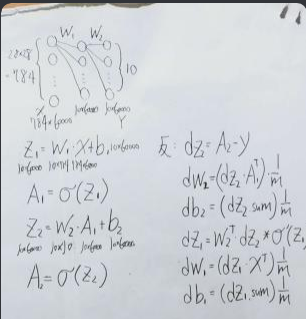

In [104]:
class TwoLayer4:
    def __init__(self, num_class, num_neuron1, num_neuron2, learncount, num_data=60000):
        self.w1 = np.random.randn(num_neuron2, num_neuron1)
        self.b1 = np.random.randn(num_neuron2, 1)
        self.w2 = np.random.randn(num_class, num_neuron2)
        self.b2 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = sigmoid(self.z1)
        self.z2 = np.dot(self.w2, self.A1) + self.b2
        self.A2 = softmax(self.z2)
        return self.A2

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw2 = np.dot(error, self.A1.T) / self.num_data
        self.db2 = np.sum(error, axis=1, keepdims=True) / self.num_data
        self.dz1 = np.dot(self.w2.T, error) + derv_sigmoid(self.z1)
        self.dw1 = np.dot(self.dz1, x_train.T) / self.num_data
        self.db1 = np.sum(self.dz1, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1
        self.w2 = self.w2 - self.lr * self.dw2
        self.b2 = self.b2 - self.lr * self.db2

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

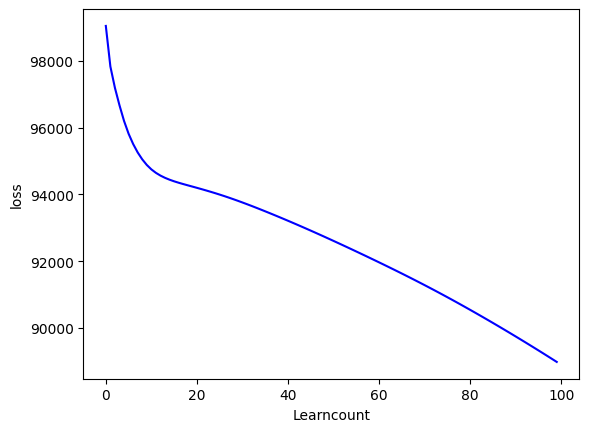

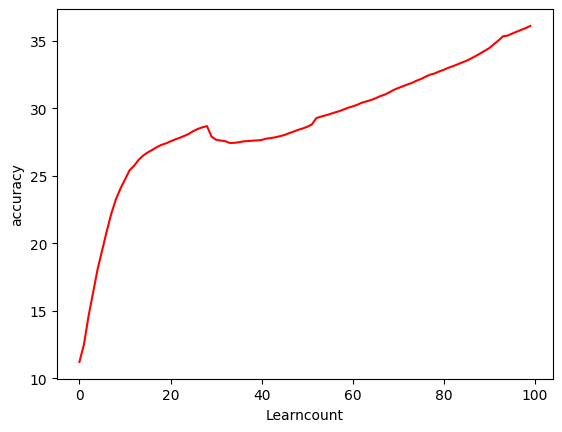

In [105]:
# train
nn4 = TwoLayer4(10, 784, 10, 100)
nn4.train()

### 5. two layer NN:
activation function: *relu* <p>
loss function: *activation function gradient + error*

In [101]:
class TwoLayer5:
    def __init__(self, num_class, num_neuron1, num_neuron2, learncount, num_data=60000):
        self.w1 = np.random.randn(num_neuron2, num_neuron1)
        self.b1 = np.random.randn(num_neuron2, 1)
        self.w2 = np.random.randn(num_class, num_neuron2)
        self.b2 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = relu(self.z1)
        self.z2 = np.dot(self.w2, self.A1) + self.b2
        self.A2 = softmax(self.z2)
        return self.A2

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw2 = np.dot(error, self.A1.T) / self.num_data
        self.db2 = np.sum(error, axis=1, keepdims=True) / self.num_data
        self.dz1 = np.dot(self.w2.T, error) + relu_derive(self.z1)
        self.dw1 = np.dot(self.dz1, x_train.T) / self.num_data
        self.db1 = np.sum(self.dz1, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1
        self.w2 = self.w2 - self.lr * self.dw2
        self.b2 = self.b2 - self.lr * self.db2

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

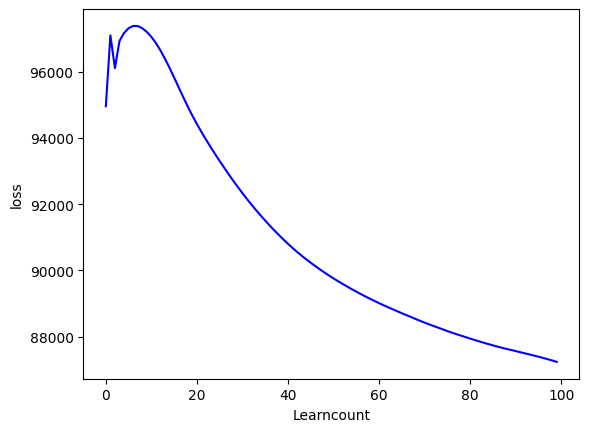

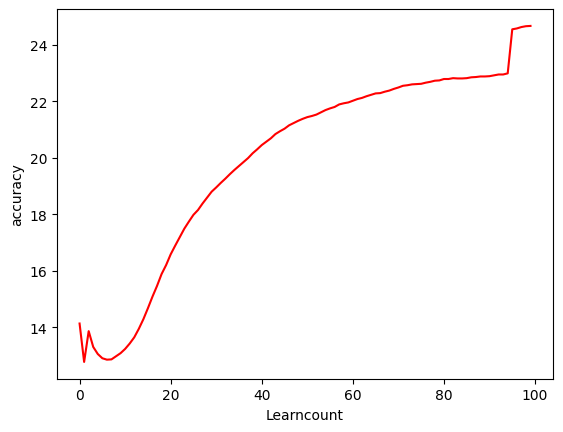

In [95]:
# train
nn5 = TwoLayer5(10, 784, 10, 100)
nn5.train()

### 6. two layer NN:
activation function: *sigmoid* <p>
loss function: *gradient * error*

In [98]:
class TwoLayer6:
    def __init__(self, num_class, num_neuron1, num_neuron2, learncount, num_data=60000):
        self.w1 = np.random.randn(num_neuron2, num_neuron1)
        self.b1 = np.random.randn(num_neuron2, 1)
        self.w2 = np.random.randn(num_class, num_neuron2)
        self.b2 = np.random.randn(num_class, 1)
        self.num_data = num_data
        self.learncount = learncount
        self.lr = 0.25  # learning rate
        self.Loss_for_Plot = np.zeros(learncount)
        self.Accuracy_for_Plot = np.zeros(learncount)

    def forward(self, input):
        self.z1 = np.dot(self.w1, input) + self.b1
        self.A1 = sigmoid(self.z1)
        self.z2 = np.dot(self.w2, self.A1) + self.b2
        self.A2 = softmax(self.z2)
        return self.A2

    def backward(self, predict, ground_truth):
        error = predict - ground_truth
        self.dw2 = np.dot(error, self.A1.T) / self.num_data
        self.db2 = np.sum(error, axis=1, keepdims=True) / self.num_data
        self.dz1 = np.dot(self.w2.T, error) * derv_sigmoid(self.z1)
        self.dw1 = np.dot(self.dz1, x_train.T) / self.num_data
        self.db1 = np.sum(self.dz1, axis=1, keepdims=True) / self.num_data

        #update weights and bias
        self.w1 = self.w1 - self.lr * self.dw1
        self.b1 = self.b1 - self.lr * self.db1
        self.w2 = self.w2 - self.lr * self.dw2
        self.b2 = self.b2 - self.lr * self.db2

    def save_data_for_plot(self, i, predict, ground_truth):
        self.Loss_for_Plot[i] = cross_entropy_loss(predict, ground_truth)
        correct_count = 0
        y_predict = np.argmax(predict, axis=0).T  # (10, 60000) matrix => watch along with column => y_predict:(60000, 1)
        for column in range(self.num_data):
            if (y_predict[column] == train_y[column]):
                correct_count += 1

        accuracy = round(correct_count / self.num_data * 100, 2)
        self.Accuracy_for_Plot[i] = accuracy

    def show_accuracy(self, predict, ground_truth, showtext=False):

        self.learncount_for_plot = np.arange(self.learncount)
        learncount_for_plotacc = np.arange(self.learncount)

        if showtext:
            print("Accuracy:{}%".format(self.Accuracy_for_Plot[0]))
            print("Loss:{}".format(self.Loss_for_Plot[0]))

        else:
            # show the loss graph
            plt.plot(self.learncount_for_plot, self.Loss_for_Plot, color='blue')
            plt.xlabel("Learncount")
            plt.ylabel("loss")
            plt.show()

            # show the accuracy graph
            plt.plot(self.learncount_for_plot, self.Accuracy_for_Plot, color='red')
            plt.xlabel("Learncount")
            plt.ylabel("accuracy")
            plt.show()

    def train(self):
        for i in range(self.learncount):
            self.output = self.forward(x_train)
            self.backward(self.output, y_train)
            self.save_data_for_plot(i, self.output, y_train)

        self.show_accuracy(self.output, y_train)

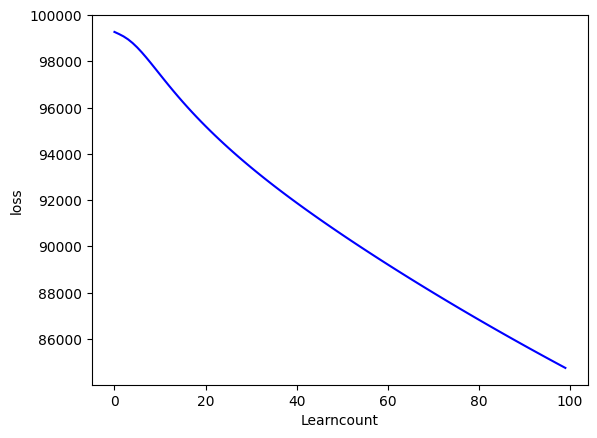

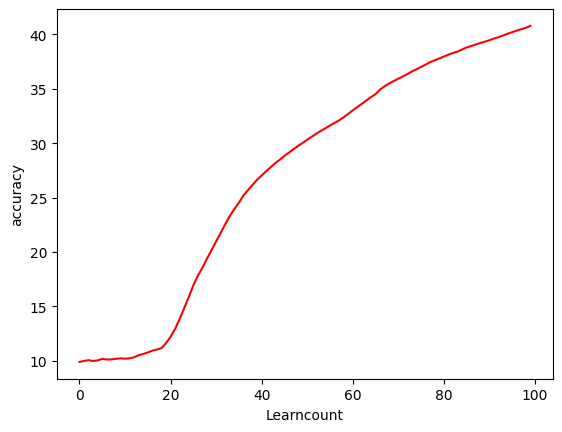

In [99]:
# train
nn6 = TwoLayer6(10, 784, 10, 100)
nn6.train()

### BEST: One layer NN:
activation function: *sigmoid*

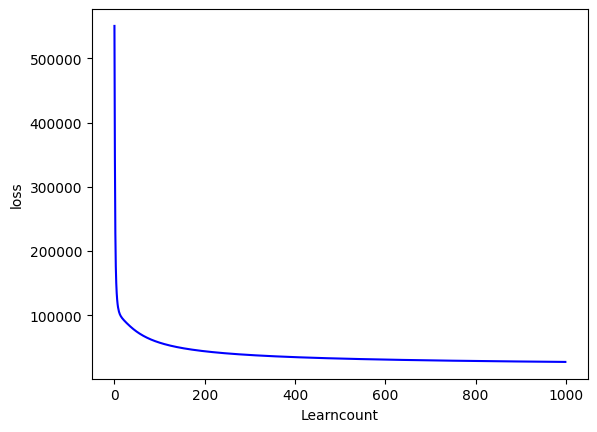

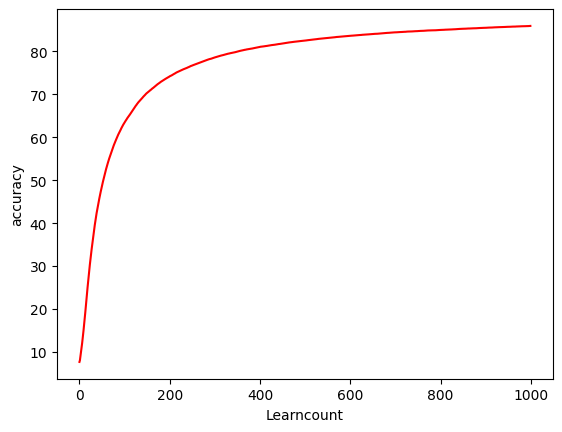

In [112]:
# train
nn1 = OneLayer1(10, 784, 1000)
nn1.train()

In [113]:
nn1.test(x_test, y_test)

predict result = 
 [7 2 1 ... 4 8 6]
real result = 
 [7 2 1 ... 4 5 6]
model accuracy = 86.15%
